<a href="https://colab.research.google.com/github/bibidemarezoyens/LB/blob/main/plotjes_voor_rowrowrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
complete_df = pd.read_csv('ploeg_final_df.csv')
print(complete_df.head())

   ervaring  500_split  2k tijd  binary_trainingtype  binary_geslacht  \
0         1      104.6    379.9                    0                0   
1         1      104.7    379.9                    0                0   
2         1      104.3    379.9                    0                0   
3         1      104.0    379.9                    0                0   
4         1      104.1    379.9                    0                0   

   binary_gewichtsklasse  binary_ploeg  
0                      1             0  
1                      1             0  
2                      1             0  
3                      1             0  
4                      1             0  


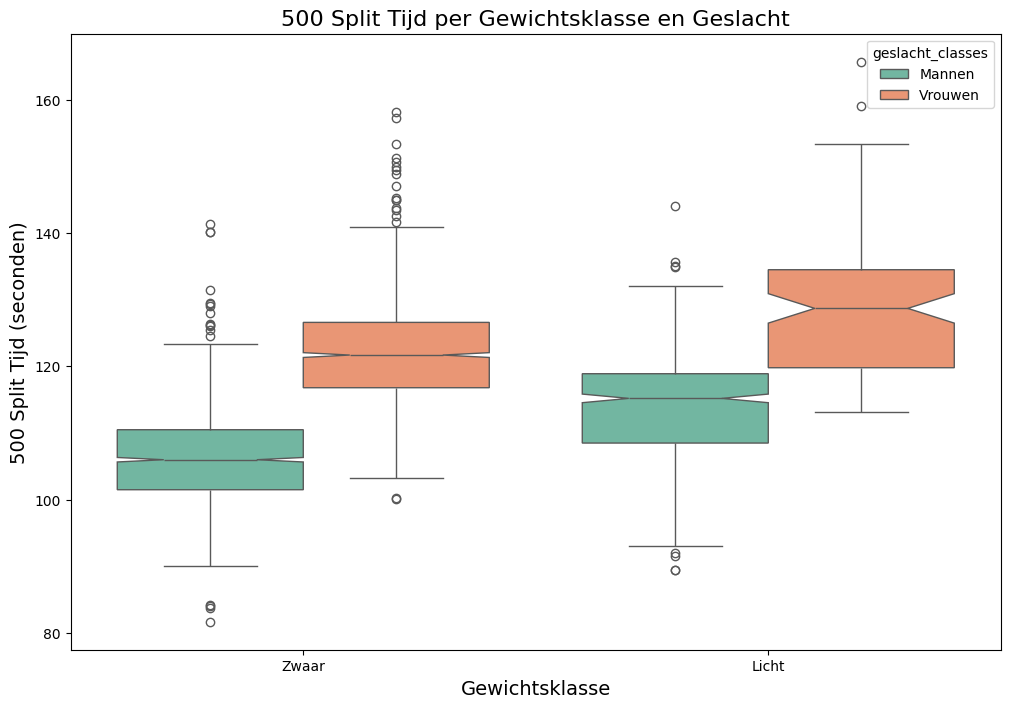

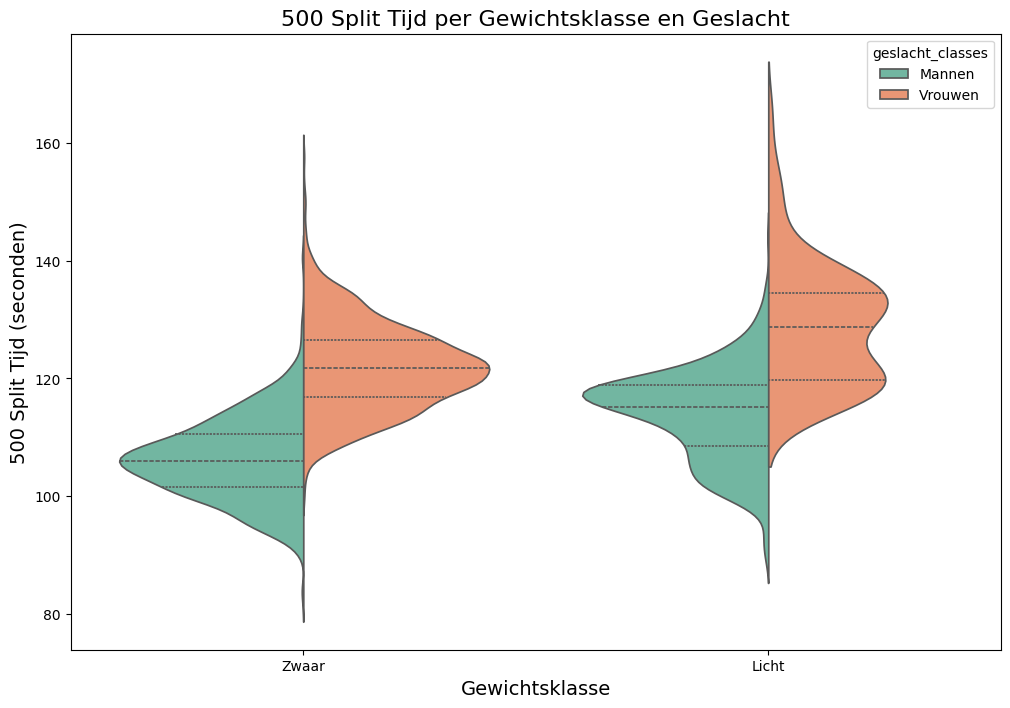

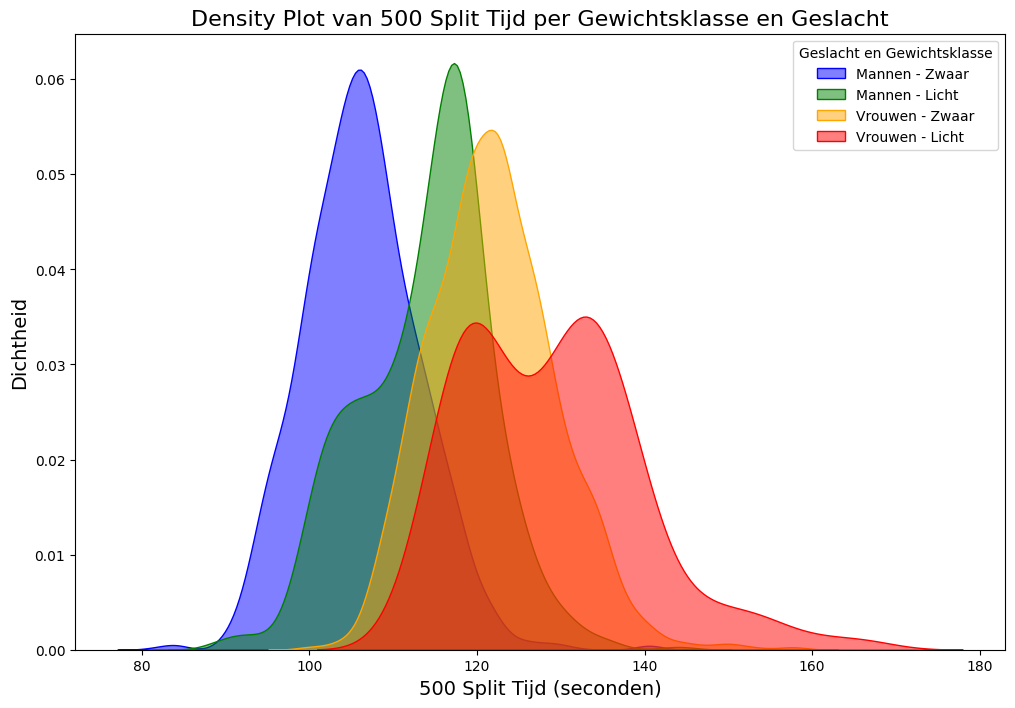

/tmp/ipykernel_9096/2354231031.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='groep', data=complete_df, palette='Set2')


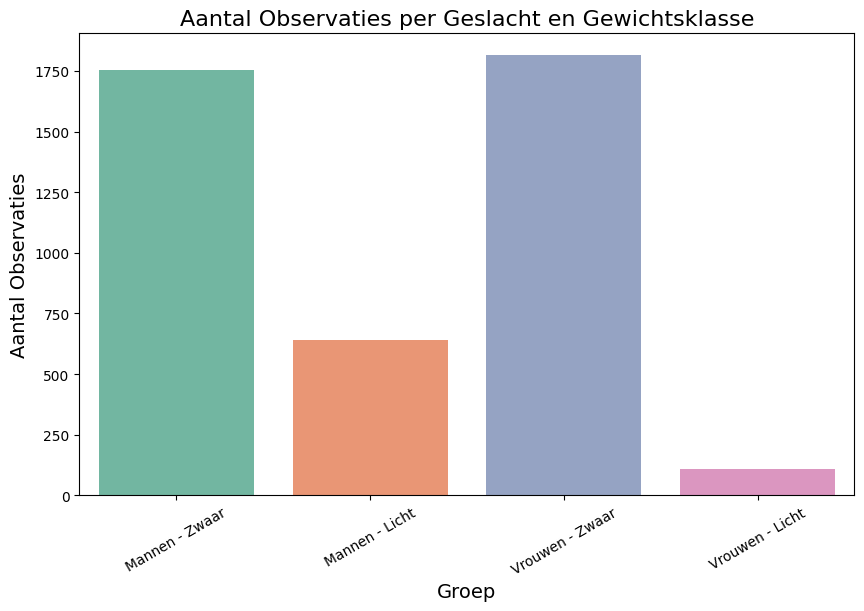

In [3]:
complete_df['geslacht_classes'] = complete_df['binary_geslacht'].map({0: 'Mannen', 1: 'Vrouwen'})
complete_df['gewicht_classes'] = complete_df['binary_gewichtsklasse'].map({0: 'Licht', 1: 'Zwaar'})

#box
plt.figure(figsize=(12, 8))

sns.boxplot(x='gewicht_classes', y='500_split', hue='geslacht_classes', data=complete_df,
            palette='Set2', notch=True)

plt.title("500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("Gewichtsklasse", fontsize=14)
plt.ylabel("500 Split Tijd (seconden)", fontsize=14)


#violin
plt.figure(figsize=(12, 8))

sns.violinplot(x='gewicht_classes', y='500_split', hue='geslacht_classes', data=complete_df,
               inner='quart', palette='Set2', split=True)

plt.title("500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("Gewichtsklasse", fontsize=14)
plt.ylabel("500 Split Tijd (seconden)", fontsize=14)

complete_df['binary_geslacht'] = complete_df['binary_geslacht'].astype(int)
complete_df['binary_gewichtsklasse'] = complete_df['binary_gewichtsklasse'].astype(int)

geslacht_labels = {0: "Mannen", 1: "Vrouwen"}
gewicht_labels = {0: "Licht", 1: "Zwaar"}

#density
plt.figure(figsize=(12, 8))

for (geslacht, gewichtsklasse), kleur in zip([(0, 1), (0, 0), (1, 1), (1, 0)], 
                                             ['blue', 'green', 'orange', 'red']):
    
    subset = complete_df[(complete_df['binary_geslacht'] == geslacht) & 
                         (complete_df['binary_gewichtsklasse'] == gewichtsklasse)]
    
    if not subset.empty:
        label = f"{geslacht_labels[geslacht]} - {gewicht_labels[gewichtsklasse]}"
        sns.kdeplot(data=subset['500_split'], label=label, fill=True, color=kleur, alpha=0.5)

plt.title("Density Plot van 500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("500 Split Tijd (seconden)", fontsize=14)
plt.ylabel("Dichtheid", fontsize=14)
plt.legend(title="Geslacht en Gewichtsklasse")
plt.show()

#dichtheid groepen
plt.figure(figsize=(10, 6))

complete_df['binary_geslacht'] = pd.to_numeric(complete_df['binary_geslacht'], errors='coerce')
complete_df['binary_gewichtsklasse'] = pd.to_numeric(complete_df['binary_gewichtsklasse'], errors='coerce')

complete_df['groep'] = complete_df['binary_geslacht'].map({0: 'Mannen', 1: 'Vrouwen'}) + " - " + \
                       complete_df['binary_gewichtsklasse'].map({0: 'Licht', 1: 'Zwaar'})

#bar
sns.countplot(x='groep', data=complete_df, palette='Set2')

plt.title("Aantal Observaties per Geslacht en Gewichtsklasse", fontsize=16)
plt.xlabel("Groep", fontsize=14)
plt.ylabel("Aantal Observaties", fontsize=14)
plt.xticks(rotation=30)
plt.show()
